<a href="https://colab.research.google.com/github/marymuthee/food_insecurity/blob/main/Food_Insecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING FOOD INSECURITY SEVERITY IN KENYA USING SATCLIP FOUNDATION MODEL EMBEDDINGS AND IPC PHASE DATA


## What are Foundation Models?

Foundation models are powerful AI models trained on vast amounts of data that can be adapted for a wide range of tasks, serving as a base for specialized applications. They are a form of generative AI and are the foundation for many applications, including large language models (LLMs), image generators, and other multimodal AI systems. Instead of being trained for a single, specific function, they are designed to be generalized and can perform many different functions with high accuracy.

[More on Foundation Models](https://blogs.nvidia.com/blog/what-are-foundation-models/)

Early foundation models were primarily designed for natural language and everyday imagery.
Models like BERT or GPT learned to understand language by predicting words from massive text corpora, while visual models such as CLIP and DINO learned about the world by linking internet images with their textual descriptions.

These advances demonstrated that with enough data and computation, models could learn broad, transferable knowledge understanding relationships, context, and meaning that generalize to many tasks.
However, this “knowledge of the world” was mostly built from human perspectives: photos, captions, and social contexts that don’t necessarily reflect the physical and environmental realities of the Earth.

To bridge that gap, researchers began developing Remote Sensing Foundation Models (RSFMs) large models trained directly on Earth observation data such as Sentinel, Landsat, or MODIS imagery.
Instead of learning from words or internet photos, these models learn from multi-spectral satellite observations, capturing signals of vegetation, water, soil, and atmosphere.

This evolution from language and natural images to remote sensing paved the way for models like SatCLIP, which bring foundation-model intelligence to geospatial and humanitarian applications.

[Remote Sensing Foundation models](https://arxiv.org/abs/2410.16602)

## What is SATCLIP?

SatCLIP is a geospatial foundation model that jointly trains an image encoder and a location encoder using satellite image location pairs. After pretraining, you can feed it a (lon, lat) and get a location embedding (a numeric vector) that summarizes environmental context (e.g., biome/vegetation/terrain signals learned from imagery). You can compare locations via cosine similarity, cluster them, or plug embeddings into downstream models.

[Learn more on SatCLIP](https://github.com/microsoft/satclip)

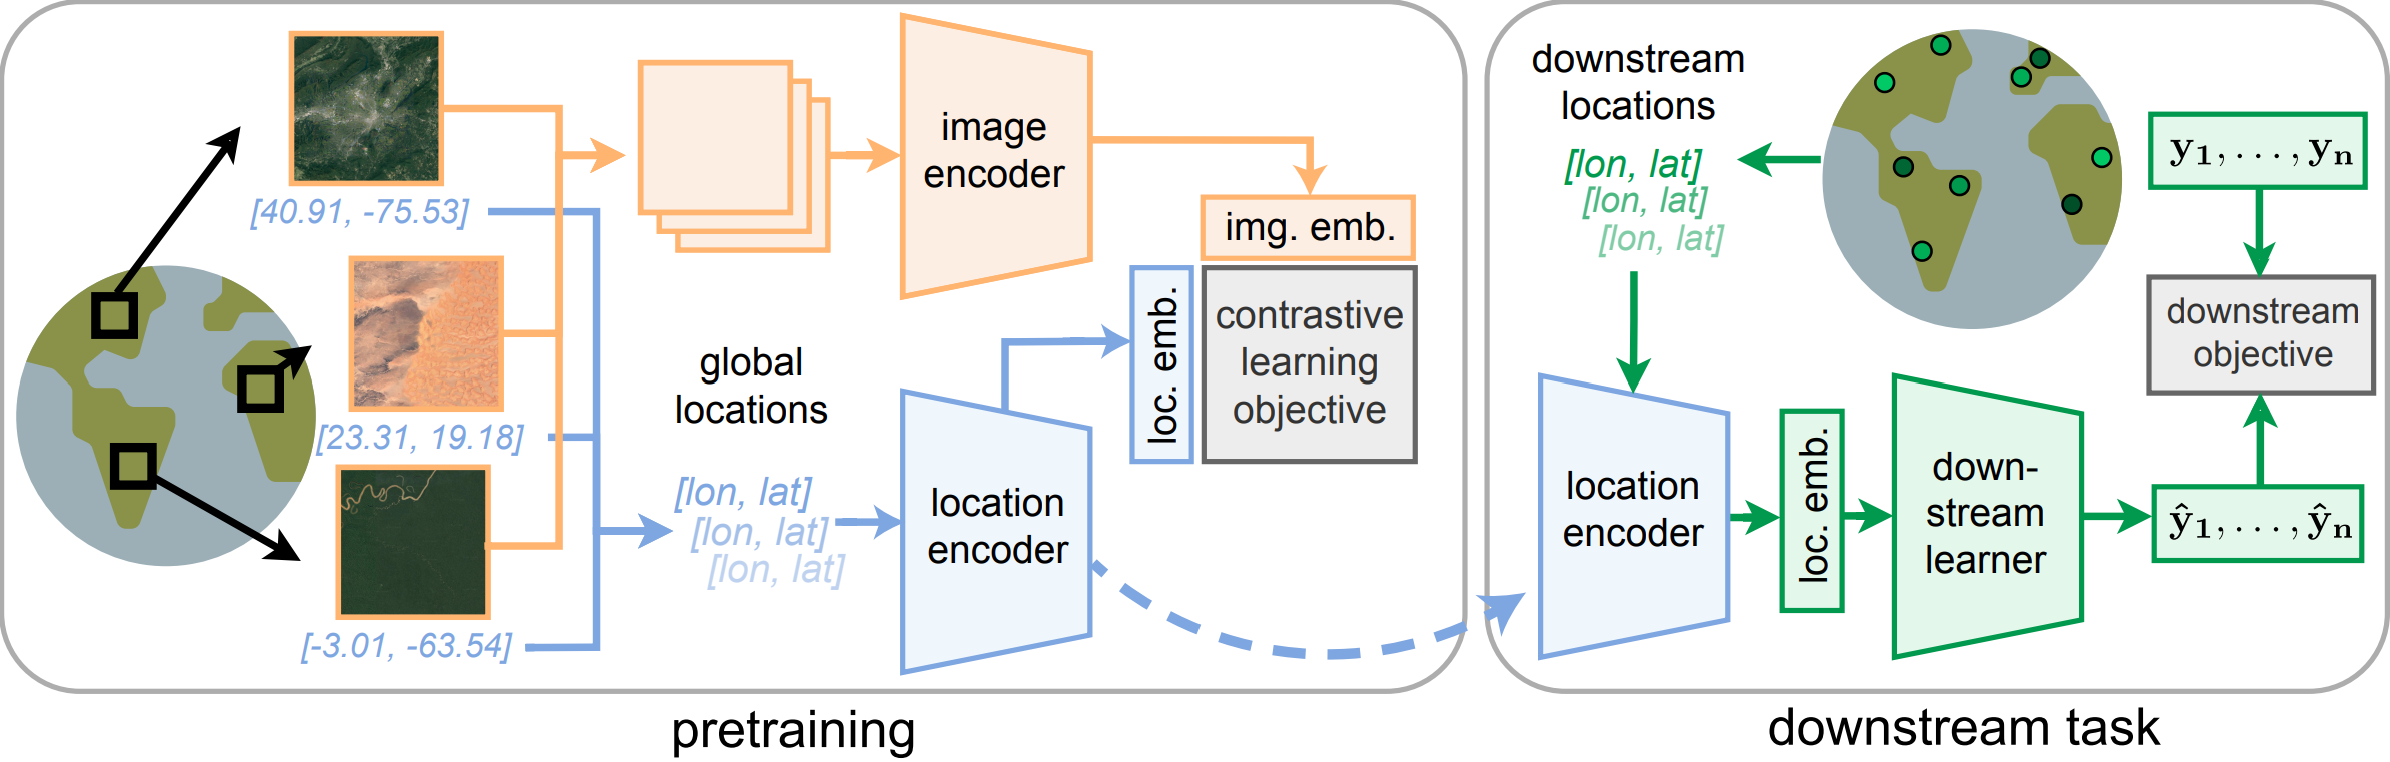

## IPC Phase Data

The Integrated Food Security Phase Classification (IPC) is a global, standardized framework used to classify the severity of acute food insecurity. It combines evidence from household surveys, nutrition indicators, market conditions, climate data, and expert analysis to produce a comparable, evidence-based picture of food insecurity severity.

IPC results are reported using five phases, each representing a different severity level:

| IPC Phase | Description |
|----------|-------------|
| **Phase 1 – Minimal** | Households can meet essential food and non-food needs without engaging in unsustainable strategies. |
| **Phase 2 – Stressed** | Households have minimally adequate food consumption but struggle to afford essential non-food expenditures. |
| **Phase 3 – Crisis** | Households experience food gaps or must deplete livelihood assets to meet minimum food needs. |
| **Phase 4 – Emergency** | Extreme food consumption gaps, very high acute malnutrition, and elevated risk of mortality. |
| **Phase 5 – Famine / Catastrophe** | Near-complete food consumption collapse, starvation, and extremely critical conditions. |


In addition to assigning an overall phase, IPC also reports the population distribution across phases, showing what proportion of people fall into Phase 1 through Phase 5 in each administrative area (e.g., a county). For example, a county may have:40% in Phase 2, 30% in Phase 3, 5% in Phase 4

These detailed distributions allow for the creation of continuous measures of severity, such as: a weighted severity index (average IPC phase), or the Crisis+ share, representing the proportion of people in Phase 3 or worse.

Typically, IPC analysis is published at administrative-unit scale, meaning the data is:
1. Discrete (tied to counties or districts)
2. Sparse (not available for every location)
3. Non-continuous (does not provide pixel-level estimates)

Because of this, IPC maps cannot naturally show continuous spatial variation between administrative boundaries. This limitation motivates the use of geospatial foundation models—such as SatCLIP—which leverage environmental patterns learned from global data to estimate food insecurity conditions at much finer spatial scales.

## Traditional Approaches to Mapping Food Insecurity

Food insecurity is traditionally monitored through systems such as the IPC and FEWS NET, which bring together household survey data, market and production trends, nutrition indicators, climate information, and expert analysis. These assessments are produced regularly—often every season—and many include projections that look several months ahead. Because of this, IPC products are incredibly valuable for early warning and humanitarian planning. However, the way these results are mapped remains fairly coarse. IPC maps usually show conditions at administrative levels like counties or livelihood zones, which means an entire region is assigned a single phase even though real conditions can differ dramatically within that boundary. The maps also remain discrete rather than continuous: they show polygons, not smooth gradients, so they cannot capture the fine-scale spatial variation that often exists between communities or across landscapes. In other words, IPC tells us what the situation is and where it falls within broad areas, but it does not reveal the subtle, pixel-level patterns that might help identify local hotspots or gaps. This creates a natural space for geospatial foundation models like SatCLIP, which can complement IPC by producing continuous, high-resolution surfaces that reflect underlying environmental patterns and provide a more detailed view of food insecurity across space.

## Foundation Models in Food Insecurity

Foundation models mark a major shift in how we can understand and map conditions across the Earth. Unlike traditional approaches that depend on manually selecting and preprocessing many different environmental, climatic, and socio-economic datasets, foundation models learn directly from vast amounts of geospatial information—satellite imagery, climate patterns, terrain features, vegetation signals, and long-term environmental dynamics.

Through this large-scale training, they develop a deep, generalized understanding of how places behave and how different landscapes respond to ecological and climatic stressors. This makes them especially powerful in settings where detailed, continuous data is limited or difficult to obtain. Instead of relying on dozens of hand-crafted indicators, a foundation model can provide a single embedding that captures the environmental character of a location in a rich and compact way.



For food insecurity analysis, this is extremely valuable, because the drivers of food insecurity which include drought, degraded vegetation, poor soils, extreme temperatures, flooding risk, remoteness among others are all deeply tied to the physical environment. A model like SatCLIP, which has learned global environmental patterns, can capture these signals even in places where no direct measurements exist. By leveraging these embeddings, we can move beyond administrative boundaries and estimate food insecurity severity continuously across space, filling in the gaps between surveyed areas and providing a more nuanced picture of risk. In this way, foundation models do not replace systems like IPC they enhance them by revealing the fine-scale spatial patterns that traditional methods cannot easily capture.

## Spatial Embeddings

Embeddings are numerical representations that capture the meaning or characteristics of data in a way that computers can understand and compare. In foundation models, they serve as the link between raw input (such as text, images, or geographic coordinates) and higher-level understanding. Each input whether it’s a word, an image, or a satellite observation is converted into a vector of numbers that describes its most important features. Inputs that are similar in meaning or appearance end up having similar embeddings. In the context of SatCLIP, embeddings allow the model to represent each location or image as a compact summary of its environmental and spatial characteristics. This makes it possible to compare places, cluster similar environments, and transfer knowledge from one region to another without retraining the model.

SatCLIP outputs two main types of embeddings:

* Location embeddings — generated from coordinates (longitude, latitude), representing the physical and environmental context of that point.
* Image embeddings — generated from small satellite image patches (e.g., Sentinel-2 tiles) that capture the surface appearance of that location.



## Study Objectives

The main objectives of this study are:
1. To generate SatCLIP location embeddings for Kenyan county centroids using IPC geometry.
2. To model IPC overall_phase as a binary outcome (crisis vs ctressed) using SatCLIP embeddings and evaluate performance with leave-one-out cross-validation.
3. To produce a continuous crisis probability map by applying the trained classification model to a regular spatial grid and mapping P(IPC ≥ 3).
4. To derive a continuous IPC severity index from county-level phase population percentages (Phase 1–5).
5. To train a regression model that predicts the IPC severity index from SatCLIP embeddings and assess its performance using leave-one-out cross-validation.
6. To generate a continuous IPC Severity Surface across Kenya by applying the regression model to the same spatial grid and visualizing expected severity values between phase 1 and phase 3

# Methodological Workflow

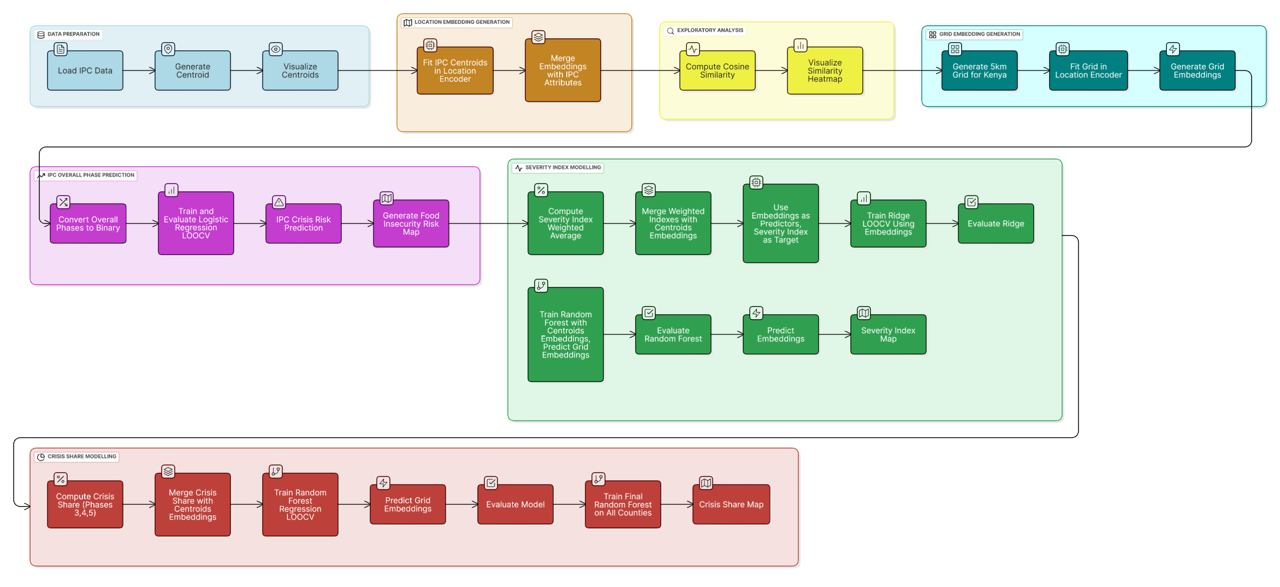

# ANALYSIS AND MODELLING

## Libraries

In [ ]:
#we install some of the required libraries
!pip install geopandas --quiet  #for vector data manipulation
!pip install lightning --quiet # Lightning simplifies PyTorch by handling all the training boilerplate.
!pip install rasterio --quiet  #for handling raster
!pip install torchgeo --quiet #extended pytorch for handling geo data
!pip install basemap --quiet #for plotting maps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.9/827.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.5/240.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#importing the libraries
import geopandas as gpd
import numpy as np
import pandas as pd

## Data

In [ ]:
#import data from github
ipc_url="https://github.com/marymuthee/datasets/raw/main/ipc_ken.geojson"

gdf_ipc=gpd.read_file(ipc_url) #read the file

#subcounties boundary
sub_url="https://github.com/marymuthee/datasets/raw/main/ken_subcounties_ipc.gpkg"
sub_counties=gpd.read_file(sub_url)

display(sub_counties.head(2))
#display(gdf_ipc.head(2)) #display the first two rows

,country,provpcode,province,ctypcode,county,scpcode,subcounty,dhis2_id,geometry
0,Kenya,KEN_1_5,Rift Valley,KEN_2_23,Turkana,KEN_3_125,Turkana Central Sub County,zd8rhYqGowE,"MULTIPOLYGON (((35.82105 3.69895, 35.81983 3.6..."
1,Kenya,KEN_1_3,Eastern,KEN_2_10,Marsabit,KEN_3_46,NORTH HORR,j6fqt5TYqPZ,"MULTIPOLYGON (((36.21334 3.59653, 36.21235 3.6..."


In [ ]:
#list all columns from the imported data
gdf_ipc.columns

Index(['aar_id', 'confidence_level', 'ipc_period', 'overall_phase',
       'population_min', 'population_percentage_min', 'justification',
       'prolonged_crisis', 'population_phase_worse',
       'population_percentage_phase_worse', 'anl_id', 'admin_type', 'title',
       'view_level', 'hide_settlement_labels', 'hide_area_labels',
       'hide_area_borders', 'show_area_popups', 'color',
       'estimated_population', 'phase1_population', 'phase1_percent',
       'phase1_color', 'phase2_population', 'phase2_percent', 'phase2_color',
       'phase3_population', 'phase3_percent', 'phase3_color',
       'phase4_population', 'phase4_percent', 'phase4_color',
       'phase5_population', 'phase5_percent', 'phase5_color', 'geometry'],
      dtype='object')

## Extracting centroids from the counties

In [ ]:
# Make a copy of the data to avoid altering original
gdf_centroids = gdf_ipc.copy()

# Compute centroid for each county polygon
gdf_centroids["centroid"] = gdf_centroids.geometry.centroid #create a column centroid

gdf_centroids.head(2)

/tmp/ipython-input-3552853276.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_centroids["centroid"] = gdf_centroids.geometry.centroid #create a column centroid


,aar_id,confidence_level,ipc_period,overall_phase,population_min,population_percentage_min,justification,prolonged_crisis,population_phase_worse,population_percentage_phase_worse,...,phase3_percent,phase3_color,phase4_population,phase4_percent,phase4_color,phase5_population,phase5_percent,phase5_color,geometry,centroid
0,82906170,2,C,3,103000,0.2,,False,None,None,...,0.2,#c80000,0,0.00,#640000,0,0,#640000,"POLYGON ((36.64151 4.44521, 36.64853 4.44411, ...",POINT (37.66047 2.95331)
1,82906172,2,C,2,109950,0.15,,False,None,None,...,0.1,#c80000,36650,0.05,#640000,0,0,#640000,"POLYGON ((35.78115 1.65673, 35.78546 1.65586, ...",POINT (35.96546 0.82306)


In [ ]:
# Extract lon/lat from centroid
gdf_centroids["lon"] = gdf_centroids.centroid.x #add to a lon column
gdf_centroids["lat"] = gdf_centroids.centroid.y #add to lat column
gdf_centroids.head(2) #dispaly the first to row

/tmp/ipython-input-3030186982.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_centroids["lon"] = gdf_centroids.centroid.x #add to a lon column
/tmp/ipython-input-3030186982.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_centroids["lat"] = gdf_centroids.centroid.y #add to lat column


,aar_id,confidence_level,ipc_period,overall_phase,population_min,population_percentage_min,justification,prolonged_crisis,population_phase_worse,population_percentage_phase_worse,...,phase4_population,phase4_percent,phase4_color,phase5_population,phase5_percent,phase5_color,geometry,centroid,lon,lat
0,82906170,2,C,3,103000,0.2,,False,None,None,...,0,0.00,#640000,0,0,#640000,"POLYGON ((36.64151 4.44521, 36.64853 4.44411, ...",POINT (37.66047 2.95331),37.660469,2.953311
1,82906172,2,C,2,109950,0.15,,False,None,None,...,36650,0.05,#640000,0,0,#640000,"POLYGON ((35.78115 1.65673, 35.78546 1.65586, ...",POINT (35.96546 0.82306),35.965465,0.823058


In [ ]:
#check the centroids columns
gdf_centroids.columns

#we only select the needed columns
df_sites=gdf_centroids[[
    "title",
    "overall_phase",
    "estimated_population",
    "lon",
    "lat"]]
df_sites.head(2)  #show the first two rows

,title,overall_phase,estimated_population,lon,lat
0,Marsabit,3,515000,37.660469,2.953311
1,Baringo,2,733000,35.965465,0.823058


In [ ]:
#rename the title column to county
df_sites=df_sites.rename(columns={"title":"county"})
df_sites.head(2)  #print the first two rows

,county,overall_phase,estimated_population,lon,lat
0,Marsabit,3,515000,37.660469,2.953311
1,Baringo,2,733000,35.965465,0.823058


## Centroids Map


In [ ]:
#import the folium library
import folium

#find the lat/lon mean to center map to
center_lat=df_sites["lat"].mean()
center_lon=df_sites["lon"].mean()

#define the map object
m=folium.Map(location=[center_lat,center_lon],
             zoom_start=6,
             tiles="CartoDB positron")
#display(m)

#define th color scheme using the phases
phase_colors={
    1:"green", #Minimal
    2:"yellow", #Stressed
    3:"orange", #crisis
    4:"red",  #Emergency
    5:"purple"  #Famine /Catastrophe

}

#adding each of the points to the map
for _, r in df_sites.iterrows():

   phase = int(r["overall_phase"]) #read the row phase and convert to integer
   color = phase_colors.get(phase, "gray") # default to gray if missing
   folium.CircleMarker( location=[r["lat"], r["lon"]], #adds marker
                       radius=6, #cricle size
                       color=color, #use the define color
                       fill=True, #fill the circle
                       fill_opacity=0.9,
                       popup=f"{r['county']} (Phase {phase})" #adds a pop up message

    ).add_to(m)

#display(m) #print the map again

#add the legend
legend_html = """
<div style="
 position: fixed;
 bottom: 50px;
 left: 50px;
 z-index: 9999;
 background-color: white;
 padding: 8px;
 border: 1px solid #ccc;
 border-radius: 4px;
 font-size: 12px; ">
 <b>IPC Overall Phase</b><br>
 <span style="color:green;">●</span> 1 – Minimal<br>
 <span style="color:yellow;">●</span> 2 – Stressed<br>
 <span style="color:orange;">●</span> 3 – Crisis<br>
 <span style="color:red;">●</span> 4 – Emergency<br>
 <span style="color:purple;">●</span> 5 – Famine/Catastrophe<br>
 </div>
 """

 #add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))
m

# SATCLIP MODEL


In [ ]:
#cloning the SatCLIP repository from microsoft
!rm -r sample_data .config # Empty current directory
!git clone https://github.com/microsoft/satclip.git . # Clone SatCLIP repository

Cloning into '.'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 283 (delta 93), reused 87 (delta 87), pack-reused 173 (from 1)
Receiving objects: 100% (283/283), 30.77 MiB | 34.21 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
#importing libraries
import rasterio  #for raster data
import lightning  #handling the models
import torchgeo
from mpl_toolkits import basemap

In [ ]:
#we will import
 #os -for cretaing folders if needed
 #torch-since satclip is built on pytorchh
 #huggingface- for check points or pretrained models

import sys, os
import torch
from huggingface_hub import hf_hub_download

# Make SatCLIP python package available (from the repo we cloned earlier)
sys.path.append("/content/satclip")  #define the load file folder

from load import get_satclip

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# download checkpoint
ckpt_path = hf_hub_download(repo_id="microsoft/SatCLIP-ViT16-L40",
                            filename="satclip-vit16-l40.ckpt")

# load model
model = get_satclip(ckpt_path=ckpt_path, device=device)
model.eval()

Using device: cpu


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


satclip-vit16-l40.ckpt:   0%|          | 0.00/121M [00:00<?, ?B/s]

using pretrained moco vit16
Downloading: "https://hf.co/torchgeo/vit_small_patch16_224_sentinel2_all_moco/resolve/1cb683f6c14739634cdfaaceb076529adf898c74/vit_small_patch16_224_sentinel2_all_moco-67c9032d.pth" to /root/.cache/torch/hub/checkpoints/vit_small_patch16_224_sentinel2_all_moco-67c9032d.pth


100%|██████████| 86.5M/86.5M [00:00<00:00, 207MB/s]


LocationEncoder(
  (posenc): SphericalHarmonics()
  (nnet): SirenNet(
    (layers): ModuleList(
      (0-1): 2 x Siren(
        (activation): Sine()
      )
    )
    (last_layer): Siren(
      (activation): Identity()
    )
  )
)

In [ ]:
#embedding function (reusable)
def embed_locations(lons: np.ndarray, lats: np.ndarray, batch_size: int = 32) -> np.ndarray:
    assert lons.shape == lats.shape  #check whether lat and lon have same length

    locs = np.stack([lons, lats], axis=1).astype(np.float64) #combine lat and lon to one array
    outs = []  #create an empty list to store the embeddings

    with torch.no_grad(): #just use model for inference
        for i in range(0, len(locs), batch_size): #function to loop through locations
            batch = torch.from_numpy(locs[i:i+batch_size]).to(device).double() #convert to tensors
            emb = model(batch) #pass the tensor batches to the model
            outs.append(emb.detach().cpu().numpy()) #move the emb to CPU and convert to numpy and store in the mepyt list

    return np.vstack(outs) #stack all embe batc and store in an array

In [ ]:
#extract the embedding for the centroids (df_site)
lon_arr = df_sites["lon"].to_numpy(dtype=float) #extract lon from the df_sites and converty to numpy
lat_arr = df_sites["lat"].to_numpy(dtype=float) #extract latitude and convert to numpy

loc_emb = embed_locations(lon_arr, lat_arr) #pair the two and apply the embeddings function

loc_emb.shape #print the embeddings length
loc_emb

array([[-0.70251583,  3.2803521 , -0.32752913, ...,  1.78529569,
         3.74024385,  0.13705813],
       [ 1.82500291,  2.89250148,  3.04314803, ...,  2.50902243,
         3.79513297, -4.69441831],
       [ 0.42236179,  3.71393828,  1.36276339, ...,  2.12468931,
         6.326784  , -3.05425247],
       ...,
       [-1.46267582,  4.45898597,  2.64261903, ...,  0.46906067,
         0.90183605, -0.54315426],
       [-0.97736528,  2.21689165,  0.39258847, ...,  1.01303132,
         5.54378957,  1.09426908],
       [ 1.6322464 ,  3.26749171,  4.37922629, ...,  1.8172422 ,
         2.15430078, -3.4561142 ]])

In [ ]:
#merge it with the original data
# Create embedding column names
emb_cols = [f"e{i}" for i in range(loc_emb.shape[1])] #create column names for the mebeddings

# Combine into a new dataframe
df_emb = pd.concat([
    df_sites.reset_index(drop=True), #remove initial index
    pd.DataFrame(loc_emb, columns=emb_cols) #convert the embeddings to a dataframe
], axis=1)

df_emb.head(2) #show first two rows


,county,overall_phase,estimated_population,lon,lat,e0,e1,e2,e3,e4,...,e246,e247,e248,e249,e250,e251,e252,e253,e254,e255
0,Marsabit,3,515000,37.660469,2.953311,-0.702516,3.280352,-0.327529,-3.085077,2.210356,...,0.776411,0.709069,0.535943,-1.238968,0.387191,-0.025091,-1.065508,1.785296,3.740244,0.137058
1,Baringo,2,733000,35.965465,0.823058,1.825003,2.892501,3.043148,-2.321957,2.710535,...,-2.491724,-5.213743,-2.091280,-3.230642,1.895333,0.259626,-0.926968,2.509022,3.795133,-4.694418


## Evaluating satCLIP

### Cosine Similarity

When we generate embeddings using SatCLIP,each location is represented by a vector a list of numbers (for example, [0.12, 0.45, -0.21, ...]) that captures the environmental characteristics of that site.
To compare how similar two locations are, we need a way to measure how close their vectors are to each other.

One common way to do this is through cosine similarity.

Cosine similarity measures the angle between two vectors in multi-dimensional space.


*   If two vectors point in the same direction, the angle between them is small → their cosine value is close to 1, meaning they are very similar.
*   If they point in opposite directions, the angle is large → cosine value close to –1, meaning very dissimilar.
*  If they are perpendicular (unrelated), the cosine value is around 0

[Learn More on Cosine Similarity](https://www.tigerdata.com/learn/understanding-cosine-similarity)

### Visualizing cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Extract only embeddings
X_emb = df_emb[emb_cols].to_numpy(dtype=float) #use emb_cols defined above

# Compute cosine similarity matrix
cos_sim = cosine_similarity(X_emb)

#convert to a dataframe
cos_sim_df = pd.DataFrame(
    cos_sim,
    index=df_emb["county"],
    columns=df_emb["county"]
)

#display the dataframe

display(cos_sim_df.head(30))

county,Marsabit,Baringo,Embu,Isiolo,Kilifi,Makueni,Laikipia,Kwale,Mandera,Garissa,...,Meru,Narok,Nyeri,Samburu,Taita,TANA RIVER,Tharaka,Turkana,Wajir,West pokot
county,,,,,,,,,,,,,,,,,,,,,
Marsabit,1.000000,0.634124,0.641607,0.821705,0.364060,0.611422,0.659268,0.448368,0.747562,0.520969,...,0.753871,0.354910,0.567493,0.893404,0.485815,0.458856,0.709565,0.793187,0.695684,0.675587
Baringo,0.634124,1.000000,0.836929,0.637292,0.280988,0.719224,0.953874,0.408747,0.446185,0.325691,...,0.825883,0.883661,0.910290,0.845194,0.525182,0.370942,0.811369,0.744560,0.396849,0.921449
Embu,0.641607,0.836929,1.000000,0.804012,0.554775,0.926488,0.942166,0.621537,0.655452,0.667469,...,0.964623,0.803271,0.969632,0.824043,0.780127,0.733175,0.985263,0.587733,0.630566,0.696027
Isiolo,0.821705,0.637292,0.804012,1.000000,0.564688,0.765247,0.767268,0.612295,0.860722,0.822962,...,0.916727,0.438558,0.708553,0.891319,0.704858,0.732505,0.885957,0.624166,0.915505,0.554687
Kilifi,0.364060,0.280988,0.554775,0.564688,1.000000,0.708919,0.401537,0.952375,0.610613,0.788251,...,0.556603,0.294500,0.431417,0.401729,0.858439,0.869506,0.583787,0.254828,0.568247,0.262302
Makueni,0.611422,0.719224,0.926488,0.765247,0.708919,1.000000,0.823939,0.770152,0.695918,0.708688,...,0.885073,0.701829,0.857229,0.746873,0.923581,0.829999,0.911938,0.516344,0.627730,0.617040
Laikipia,0.659268,0.953874,0.942166,0.767268,0.401537,0.823939,1.000000,0.505423,0.571825,0.501416,...,0.939482,0.856854,0.977318,0.886193,0.651422,0.536443,0.930518,0.683180,0.542565,0.812844
Kwale,0.448368,0.408747,0.621537,0.612295,0.952375,0.770152,0.505423,1.000000,0.659602,0.745166,...,0.624012,0.387478,0.520531,0.496470,0.918826,0.825112,0.643668,0.331768,0.584193,0.378930
Mandera,0.747562,0.446185,0.655452,0.860722,0.610613,0.695918,0.571825,0.659602,1.000000,0.757036,...,0.740805,0.247018,0.532941,0.699744,0.711905,0.714850,0.726076,0.405892,0.908370,0.366868


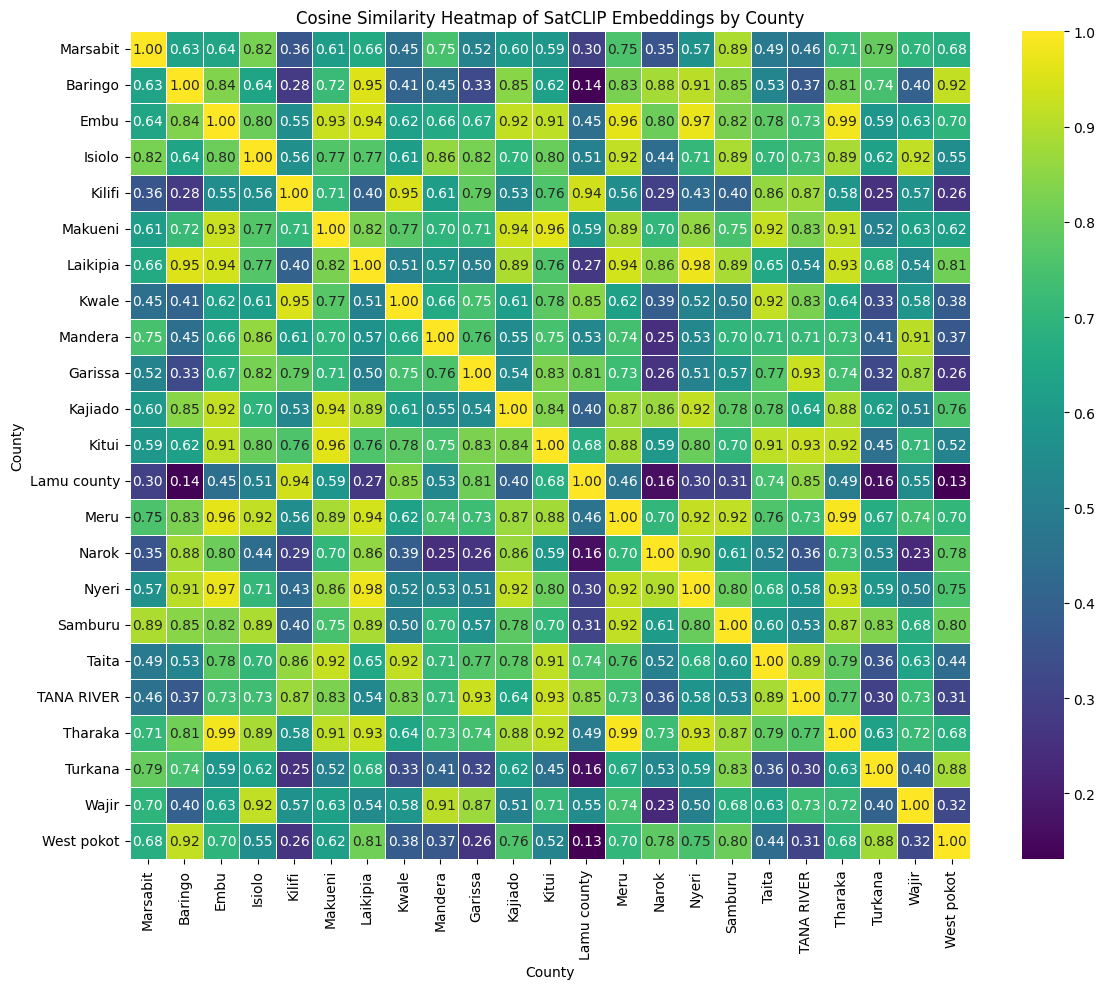

In [ ]:
#importing matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #for statistical graphics

#defining the figure size
plt.figure(figsize=(12, 10))

#plot the cos_sim data and add the values on the label
sns.heatmap(cos_sim_df, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

#plot title
plt.title('Cosine Similarity Heatmap of SatCLIP Embeddings by County')
plt.xlabel('County') #x-axis label
plt.ylabel('County')  #y-axis label

#ticks direction
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#automativally adjust or fit the labels
plt.tight_layout()
plt.show()  #display the portal

# DOWNSTREAM TASK

Having generated SatCLIP location embeddings for all Kenyan counties, the next step is to evaluate whether these embeddings can be used as predictors of food insecurity conditions. This downstream task links the learnt environmental representations from SatCLIP with real IPC data by training models that classify and quantify food insecurity severity. First, we use the county-level IPC overall_phase to build a binary crisis vs stressed model and generate a continuous crisis probability map across Kenya. Next, we enrich the target by incorporating IPC population phase percentages to derive a continuous severity index, which allows us to train a regression model and produce a severity surface. Together, these downstream tasks demonstrate how foundation model embeddings can be used to extend IPC insights beyond administrative boundaries and reveal fine-scale spatial patterns of food insecurity.

## Data Preparation

In [ ]:
#import libraries
import numpy as np
from sklearn.preprocessing import StandardScaler #scikit-learn for ML
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.model_selection import LeaveOneOut  #loocv for validation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report #evaluation metrics

#crete a list of embeddings from the embeddings data frame
#emb_cols = [c for c in df_emb.columns if isinstance(c, str) and c.startswith("e")] #pick all columns that start with e
#print("Number of embedding features:", len(emb_cols))

#convert the embeddings to numpy array
X = df_emb[emb_cols].to_numpy(dtype=float)

#creates a binary class for the phases classes (0,1)
y = (df_emb["overall_phase"].astype(int) >= 3).astype(int)

print("X shape:", X.shape)
print( y)
#print("Number of Crisis+ (1):", y.sum())

X shape: (23, 256)
0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
Name: overall_phase, dtype: int64


## LOOCV/Logistic Regression Training

The code block below implements a full Leave-One-Out Cross-Validation (LOOCV) workflow to evaluate how well logistic regression can classify counties into Crisis+ (IPC ≥ 3) or <Crisis categories using their SatCLIP embedding features. It begins by creating three key components: a LeaveOneOut splitter for generating train/test folds, a StandardScaler to normalize embedding features, and a logistic regression classifier configured to run for up to 1000 iterations. For each LOOCV iteration, one county is held out as the test sample, while the remaining counties form the training set. The training features are standardized, the classifier is fit on the scaled training data, and a prediction is generated for the left-out county. The true and predicted labels are stored across all LOOCV rounds, ensuring that every county is evaluated once as an unseen sample. After the loop, the code computes performance metrics including accuracy, F1-score, confusion matrix, and a detailed classification report to quantify how well the embeddings support binary IPC phase prediction.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

loo = LeaveOneOut() #crate an empty loocv object
scaler = StandardScaler() #scale for standardization
clf = LogisticRegression(max_iter=1000)  #define logitisc regression classifier

y_true, y_pred = [], [] #creat a list for storing the true and predicted clases

#split the data for training and testing (evaluation)
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

     #fit the scaler to the train and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #fit regression classifier
    clf.fit(X_train_scaled, y_train)
    y_hat = clf.predict(X_test_scaled) #perfoming prediction

    #store the true and predicted classes in the list created
    y_true.append(y_test.iloc[0])
    y_pred.append(y_hat[0])

#convert to a numpy array
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#evaluation metrics
print("LOOCV accuracy:", accuracy_score(y_true, y_pred)) #overall model accuracy
print("LOOCV F1 (binary):", f1_score(y_true, y_pred)) # how well it predicts each class
print("\nConfusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_true, y_pred))
print("\nClassification report:")
print(classification_report(y_true, y_pred, target_names=["<Crisis (0)", "Crisis+ (1)"]))

LOOCV accuracy: 0.9130434782608695
LOOCV F1 (binary): 0.5

Confusion matrix (rows=true, cols=pred):
[[20  0]
 [ 2  1]]

Classification report:
              precision    recall  f1-score   support

 <Crisis (0)       0.91      1.00      0.95        20
 Crisis+ (1)       1.00      0.33      0.50         3

    accuracy                           0.91        23
   macro avg       0.95      0.67      0.73        23
weighted avg       0.92      0.91      0.89        23



The Leave-One-Out Cross-Validation (LOOCV) results provide an objective assessment of how well the logistic regression classifier distinguishes between Crisis+ (IPC Phase ≥ 3) and <Crisis (Phase < 3) counties using SatCLIP-derived location embeddings. The model achieved an overall accuracy of 91%, indicating that the majority of counties were correctly classified when each sample was left out once and predicted independently. However, accuracy alone does not fully characterize performance in this imbalanced setting, where only 3 out of 23 counties fall into the Crisis+ category.

The confusion matrix shows that the model correctly identified 20 out of 20 <Crisis counties (True Negatives) and 1 out of 3 Crisis+ counties (True Positives), while misclassifying 2 Crisis+ counties as <Crisis (False Negatives). This pattern demonstrates that although the model is highly reliable for detecting non-crisis areas, it struggles more with identifying counties in Crisis+ phases. This is reflected in the class-specific metrics: the <Crisis class achieved perfect precision (1.00) and high recall (0.95), whereas the Crisis+ class obtained high precision (1.00) but substantially lower recall (0.33), yielding an F1-score of 0.50. The low recall for Crisis+ indicates that the model tends to miss some truly high-risk counties, a common challenge when the minority class is underrepresented.

Despite these limitations, the macro-averaged F1-score of 0.73 and the weighted average F1-score of 0.89 suggest that the model’s overall balance between precision and recall is acceptable for a first pass using embeddings alone. Nonetheless, improving Crisis+ detection would require incorporating additional features (e.g., demographic, environmental, or multi-temporal indicators) or using models more suited to handling class imbalance. Overall, the results demonstrate that SatCLIP location embeddings contain meaningful signal for IPC phase classification, but also highlight the need for further refinement when detecting rare high-risk conditions.

## Final Model

After using Leave-One-Out Cross-Validation (LOOCV) to evaluate model performance, the last code block retrains a single final classifier on the entire dataset. In this step, we no longer split the data into training and test sets. Instead, we assume that the generalization ability of the model has already been assessed and validated during LOOCV, so we can now use all available labeled examples to build the  model for future use. Concretely, a new StandardScaler (scaler_final) is fitted on the full feature matrix X and applied to standardize all embedding dimensions. Then, a new LogisticRegression instance (clf_final) is trained on these fully scaled features (X_scaled_full) together with all binary IPC labels y, learning a decision boundary that uses information from every county in the dataset. The final print statement confirms the classes the model distinguishes (0 = <Crisis, 1 = Crisis+).

In [ ]:
#we train a final model using all the dataset
scaler_final = StandardScaler()
X_scaled_full = scaler_final.fit_transform(X)

clf_final = LogisticRegression(max_iter=1000)
clf_final.fit(X_scaled_full, y)
print(clf_final)

print("Final model trained. Classes:", clf_final.classes_)

LogisticRegression(max_iter=1000)
Final model trained. Classes: [0 1]


# IPC PREDICTION


## Grid Generation

In [ ]:
#activate libaries
import numpy as np
import pandas as pd

#extract the gdf data bounding box
minx, miny, maxx, maxy = gdf_ipc.geometry.total_bounds
print("Bounds:", minx, miny, maxx, maxy)

#create a 5km grid
GRID_STEP = 0.05

#rows and columns for the grids
lons = np.arange(minx, maxx + GRID_STEP, GRID_STEP)
lats = np.arange(miny, maxy + GRID_STEP, GRID_STEP)

#generates a list of coordinate from the lons and lats
coords = [(lon, lat) for lon in lons for lat in lats]
df_grid = pd.DataFrame(coords, columns=["lon", "lat"]) #convert to dataframe

print("Grid points:", len(df_grid)) #ride size
df_grid.head() #coordinates data frame

Bounds: 33.974412412 -4.679622543 41.913844128 5.467319666
Grid points: 32640


,lon,lat
0,33.974412,-4.679623
1,33.974412,-4.629623
2,33.974412,-4.579623
3,33.974412,-4.529623
4,33.974412,-4.479623


## Embeddings Extraction

In [ ]:
#satclip embeddings for te locatiosn

#extract latitude and longitude from grid
#convert to numpy array
lon_arr_g = df_grid["lon"].to_numpy(dtype=float)
lat_arr_g = df_grid["lat"].to_numpy(dtype=float)

#apply the embeddings location encoder function created at the very beginning
grid_emb = embed_locations(lon_arr_g, lat_arr_g, batch_size=64)
print("Grid embeddings shape:", grid_emb.shape)

#extract the embeddings columns from the dataframe
emb_cols = [f"e{i}" for i in range(grid_emb.shape[1])]
print("Embedding feature count (train):", len(emb_cols)) #chcek if they are 256

#convert to dataframe
df_grid_emb = pd.DataFrame(grid_emb, columns=emb_cols)

#insert latitude and longitude in the dataframe
df_grid_emb.insert(0, "lat", lat_arr_g)
df_grid_emb.insert(0, "lon", lon_arr_g)

#display the first two rows
df_grid_emb.head(2)

Grid embeddings shape: (32640, 256)
Embedding feature count (train): 256


,lon,lat,e0,e1,e2,e3,e4,e5,e6,e7,...,e246,e247,e248,e249,e250,e251,e252,e253,e254,e255
0,33.974412,-4.679623,1.760302,2.152165,3.316404,-1.751056,-0.430896,-1.531700,3.543821,-0.343226,...,-3.096810,-3.914075,0.119646,-0.678572,4.503241,-2.241090,-0.333873,-1.431991,5.757707,-3.526393
1,33.974412,-4.629623,1.716124,2.214873,3.303786,-1.763670,-0.378596,-1.497274,3.552793,-0.325670,...,-3.119486,-4.004631,0.099508,-0.698434,4.486268,-2.284358,-0.328672,-1.390862,5.772910,-3.576460


## Prediction

### Logistic regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#extract embeddings columns and convert to numpy
X_grid = df_grid_emb[emb_cols].to_numpy(dtype=float)

#apply standardization
X_grid_scaled = scaler_final.transform(X_grid)

#fit the logistic regression model
probs_grid = clf_final.predict_proba(X_grid_scaled)
print("Model classes:", clf_final.classes_)

# index of Crisis+ class (1)
idx_crisis = list(clf_final.classes_).index(1)
#only extract that class probabilities
p_crisis = probs_grid[:, idx_crisis]

#crete and display the dataframe
df_grid_emb["p_crisis"] = p_crisis
df_grid_emb[["lon", "lat", "p_crisis"]].head()

Model classes: [0 1]


,lon,lat,p_crisis
0,33.974412,-4.679623,0.000490
1,33.974412,-4.629623,0.000448
2,33.974412,-4.579623,0.000409
3,33.974412,-4.529623,0.000373
4,33.974412,-4.479623,0.000338


## IPC Map

Raster size: 160 204


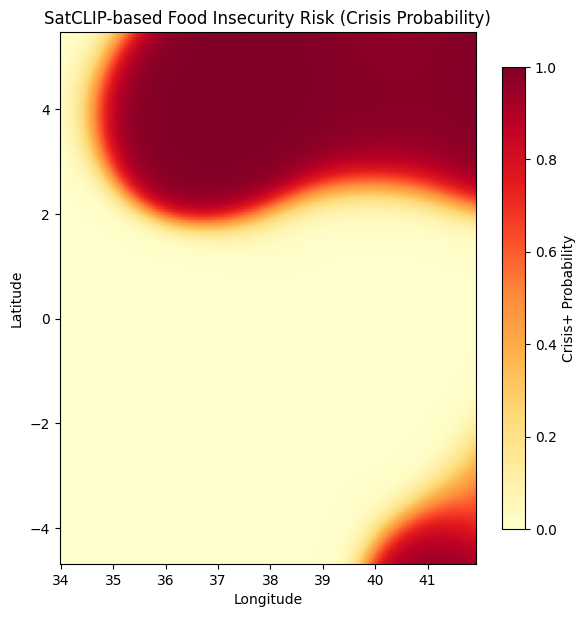

In [ ]:
#extract the cordinates from the grdi dataframe
#only pick the unique ones (removes duplicates)
unique_lons = np.unique(df_grid_emb["lon"].to_numpy())  #convert to numpy
unique_lats = np.unique(df_grid_emb["lat"].to_numpy())

#check the length of both the latitude and longitude
nx = len(unique_lons)  #grid columns
ny = len(unique_lats)  #grid rows

print("Raster size:", nx, ny)

#create an empty rast with Nan values
grid_prob = np.full((ny, nx), np.nan, dtype=float)


#create dictionary of the lat and lon
lon_idx = {lon: i for i, lon in enumerate(unique_lons)} #list all unique lon
lat_idx = {lat: j for j, lat in enumerate(unique_lats)} #all unique lat

#fill the raster grid created before
for lon, lat, val in zip(df_grid_emb["lon"], df_grid_emb["lat"], df_grid_emb["p_crisis"]):
    i = lon_idx[lon]      # column index
    j = lat_idx[lat]      # row index
    grid_prob[j, i] = val  #rasterize

#Plot teh grid as a continous surface
plt.figure(figsize=(6, 8))

im = plt.imshow(
    grid_prob, #the 2d probability map
    extent=[
        unique_lons.min(), unique_lons.max(),
        unique_lats.min(), unique_lats.max()
    ],
    origin="lower",
    cmap="YlOrRd",
    vmin=0, vmax=1,
)

plt.colorbar(im, label="Crisis+ Probability", shrink=0.6) #color ramp
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("SatCLIP-based Food Insecurity Risk (Crisis Probability)")
plt.tight_layout()
plt.show()

### Clip to Kenya

Points inside Kenya: 16797 of 32640


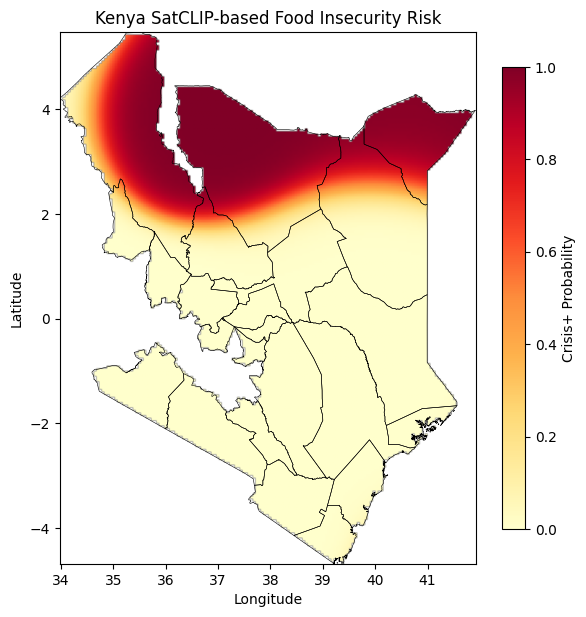

In [ ]:
#activate libraries
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt

#create a single boundary for kenya from the gdf_ipc
kenya = gdf_ipc.dissolve()
kenya_geom = kenya.geometry.iloc[0]

#build points GeoDataFrame from grid lon/lat
gdf_pts = gpd.GeoDataFrame(
    df_grid_emb[["lon", "lat", "p_crisis"]].copy(),  #extract lat, lo, crisis
    geometry=gpd.points_from_xy(df_grid_emb["lon"], df_grid_emb["lat"]),  #convert to points
    crs="EPSG:4326", #assign a crs
)

#check with points lie within Kenya
mask_inside = gdf_pts.within(kenya_geom)

#print the number of points within Kenya only
print("Points inside Kenya:", mask_inside.sum(), "of", len(mask_inside))

#create an empyt clipped raster
grid_prob_clip = np.full_like(grid_prob, np.nan, dtype=float)

# extract lat and lon again
unique_lons = np.unique(df_grid_emb["lon"].to_numpy())
unique_lats = np.unique(df_grid_emb["lat"].to_numpy())

#cretae look up dictionary to convert them to raster rows and columns
lon_idx = {lon: i for i, lon in enumerate(unique_lons)}
lat_idx = {lat: j for j, lat in enumerate(unique_lats)}

# fill only cells that are inside Kenya
for lon, lat, val, inside in zip(
    gdf_pts["lon"], gdf_pts["lat"], gdf_pts["p_crisis"], mask_inside
):
    if not inside:  #skip those outside Kenya
        continue
    i = lon_idx[lon]   # create column
    j = lat_idx[lat]   # create row
    grid_prob_clip[j, i] = val

# plotting clipped raster
plt.figure(figsize=(6, 8))
im = plt.imshow(
    grid_prob_clip,
    extent=[unique_lons.min(), unique_lons.max(),
            unique_lats.min(), unique_lats.max()],
    origin="lower",
    cmap="YlOrRd",
    vmin=0, vmax=1,
)

#add kenya boundary to the plot
gdf_ipc.boundary.plot(ax=plt.gca(), edgecolor="black", linewidth=0.4)

#color bar and labels
cbar = plt.colorbar(im, shrink=0.6)
cbar.set_label("Crisis+ Probability")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Kenya SatCLIP-based Food Insecurity Risk")
plt.tight_layout()
plt.show()

# SEVERITY INDEX PREDICTION

While the binary Crisis vs Stressed model provides a useful early-warning indicator of where food insecurity may reach IPC Phase 3 or worse, it only captures a single threshold and does not reflect the full spectrum of conditions within each county. To obtain a more nuanced and continuous understanding of food insecurity, we now make use of the IPC phase percentages the proportions of the population in Phase 1 through Phase 5. These percentages allow us to compute a continuous severity index, which represents the expected food insecurity level as a weighted average of all phases. Unlike the binary model, this index incorporates mild, moderate, and severe conditions, providing a richer picture of variation both between and within counties. In this section, we use SatCLIP embeddings to train a regression model that predicts the severity index and then apply it to a fine spatial grid to produce a continuous Severity Surface across Kenya. This step is important because it reveals subtle spatial gradients in food insecurity that are not visible in the IPC polygon map, offering a more detailed and realistic representation of underlying vulnerability patterns.

## Data Preparation

In [ ]:
# create a list with the phase ercentage columns
percent_cols = [
    "phase1_percent",
    "phase2_percent",
    "phase3_percent",
    "phase4_percent",
    "phase5_percent",
]

#create a data table with county name and the above list
df_perc = gdf_ipc[["title"] + percent_cols].copy()

# rename the title column to county
df_perc = df_perc.rename(columns={"title": "county"})

# merge into df_emb using 'county'
df_emb = df_emb.merge(df_perc, on="county", how="left")
df_emb.head(5)

,county,overall_phase,estimated_population,lon,lat,e0,e1,e2,e3,e4,...,e251,e252,e253,e254,e255,phase1_percent,phase2_percent,phase3_percent,phase4_percent,phase5_percent
0,Marsabit,3,515000,37.660469,2.953311,-0.702516,3.280352,-0.327529,-3.085077,2.210356,...,-0.025091,-1.065508,1.785296,3.740244,0.137058,0.25,0.55,0.20,0.00,0
1,Baringo,2,733000,35.965465,0.823058,1.825003,2.892501,3.043148,-2.321957,2.710535,...,0.259626,-0.926968,2.509022,3.795133,-4.694418,0.30,0.55,0.10,0.05,0
2,Embu,2,281000,37.626626,-0.604249,0.422362,3.713938,1.362763,-2.071373,2.289948,...,0.163261,0.179676,2.124689,6.326784,-3.054252,0.60,0.35,0.05,0.00,0
3,Isiolo,2,316000,38.540495,1.009829,-0.600845,2.829664,0.903888,-0.951701,2.537942,...,-1.099571,0.843610,1.434554,5.283771,-0.002216,0.50,0.40,0.10,0.00,0
4,Kilifi,2,1577000,39.685087,-3.176856,-0.238435,-1.640877,1.911457,0.072256,-2.200066,...,-0.269283,1.148932,-0.598473,2.723503,-1.134751,0.75,0.20,0.05,0.00,0


### Weighting IPC Phases

To construct the IPC Severity Index, each IPC phase is assigned a numeric weight corresponding to its official severity ranking (Phase 1 = 1, …, Phase 5 = 5). These weights are then multiplied by the proportion of the population in each phase (P1–P5), and the results are summed to obtain a single severity score. This weighting process ensures that higher phases, which represent more acute food insecurity, contribute more strongly to the final index. It captures the entire distribution of food insecurity within a county rather than relying only on the dominant phase label. This is important because it preserves the relative severity of different IPC categories, allows for comparability between areas, and produces a continuous metric suitable for statistical modelling and spatial prediction. By reflecting both the prevalence and intensity of food insecurity, the weighted index offers a more informative and analytically robust measure than a single categorical IPC phase.

In [ ]:
# Convert percent columns to numeric
for c in percent_cols:
    df_emb[c] = pd.to_numeric(df_emb[c], errors='coerce')

# pull the ipc columns and convvert to numpy array
phase_vals = df_emb[percent_cols].to_numpy(dtype=float)
# Detect scale (0–1 or 0–100)
max_val = phase_vals.max()

#id its between 1-100 then convert to ratio
if max_val <= 1.1:
    print("Detected proportions (0–1). Use them directly.")
    phase_prop = phase_vals
else:
    print("Detected percents (0–100). Convert to proportions.")
    phase_prop = phase_vals / 100.0


# Weighted IPC average p
weights = np.array([1, 2, 3, 4, 5], dtype=float) #each phase gets its severity score
df_emb["severity_index"] = (phase_prop * weights).sum(axis=1) #compute crisis and sum

# crisis+ = phase3 + phase4 + phase5
df_emb["crisis_share"] = phase_prop[:, 2:].sum(axis=1) #population in crisis and worst



df_emb[["county", "severity_index", "crisis_share"]].head(23)


Detected proportions (0–1). Use them directly.


,county,severity_index,crisis_share
0,Marsabit,1.95,0.20
1,Baringo,1.90,0.15
2,Embu,1.45,0.05
3,Isiolo,1.60,0.10
4,Kilifi,1.30,0.05
5,Makueni,1.40,0.05
6,Laikipia,1.65,0.05
7,Kwale,1.55,0.10
8,Mandera,2.15,0.30
9,Garissa,1.70,0.15


## LOOCV/ Ridge Regression Training

In [ ]:
#libraries activation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#extract emveddings column and convert to numpy
X = df_emb[emb_cols].to_numpy(dtype=float)

#extract the severity index column
y_sev = df_emb["severity_index"].to_numpy(dtype=float)

#setting up loocv and model objects
loo = LeaveOneOut()
scaler_cv = StandardScaler()
model_cv_ridge = Ridge(alpha=1.0)

#empty list for the true and predicted classes
y_true, y_pred = [], []

#loocv and model loop
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_sev[train_idx], y_sev[test_idx]

    X_train_scaled = scaler_cv.fit_transform(X_train) #standardize
    X_test_scaled = scaler_cv.transform(X_test)

    model_cv_ridge.fit(X_train_scaled, y_train) #train
    y_hat = model_cv_ridge.predict(X_test_scaled)  #predict

    y_true.append(y_test)
    y_pred.append(y_hat[0])

#convert to numpy both trueand preidcted
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#loocv metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("LOOCV RMSE:", rmse)
print("LOOCV R²:", r2)


#train final model on full dataset
#standardize
scaler_sev = StandardScaler()
X_scaled_full = scaler_sev.fit_transform(X)


#fit model
model_sev_ridge = Ridge(alpha=1.0)
model_sev_ridge.fit(X_scaled_full, y_sev)


LOOCV RMSE: 0.4640681451087122
LOOCV R²: -2.1729575186785945


Ridge()

Ridge regression is simply a linear regression model with regularization. It tries to learn a straight-line relationship between the SatCLIP embeddings and our target (in this case, the severity index), while keeping the model stable by preventing the coefficients from becoming too large. Because our embeddings have many features (256) and we only have a small number of counties, Ridge is a reasonable first model to test before moving to more complex approaches.

When we evaluated Ridge using LOOCV, we obtained:
   1. RMSE ≈ 0.46
   2. R² ≈ –2.17

The RMSE tells us that the model’s predictions are, on average, about 0.46 severity units away from the true values. This is quite large considering the severity index only spans a small range (~1.2–2.1).

The very negative R² means that Ridge performed worse than simply predicting the average severity for all counties. This outcome is not surprising: the severity index barely varies from county to county, and a simple linear model struggles to find meaningful patterns in such a high-dimensional space.

In short, Ridge gives us a useful baseline, but it cannot capture the complexity of the problem.

Because Ridge is too limited for this task, the natural next step is to try a nonlinear model. We therefore move on to exploring Random Forest Regression, which can model more flexible relationshi

## Random Forest

In [ ]:
#libraries activation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#extract emveddings column and convert to numpy
X = df_emb[emb_cols].to_numpy(dtype=float)

#extract the severity index column
y_sev = df_emb["severity_index"].to_numpy(dtype=float)

#setting up loocv and model objects
loo = LeaveOneOut()
scaler_cv = StandardScaler()

#random forest
model_cv_random = RandomForestRegressor(
    n_estimators=500,  #decision tress number
    max_depth=6,  #decision tree maximum growth
    random_state=42 #randomness seed
)


#empty list for the true and predicted classes
y_true, y_pred = [], []

#loocv and model loop
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_sev[train_idx], y_sev[test_idx]

    X_train_scaled = scaler_cv.fit_transform(X_train) #standardize
    X_test_scaled = scaler_cv.transform(X_test)

    # fit Random Forest
    model_cv_random.fit(X_train_scaled, y_train)

    # predict left-out sample
    y_hat = model_cv_random.predict(X_test_scaled)

    y_true.append(y_test[0])
    y_pred.append(y_hat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

#loocv metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("LOOCV RMSE:", rmse)
print("LOOCV R²:", r2)


#train final model on full dataset
#standardize
scaler_sev = StandardScaler()
X_scaled_full = scaler_sev.fit_transform(X)


#fit model
model_sev_random = RandomForestRegressor(
    n_estimators=500,
    max_depth=6,
    random_state=42
)
model_sev_random.fit(X_scaled_full, y_sev)


LOOCV RMSE: 0.26278121883786215
LOOCV R²: -0.017394501801967666


RandomForestRegressor(max_depth=6, n_estimators=500, random_state=42)

Random Forest Regression was used to see whether a more flexible, nonlinear model could better capture the relationship between SatCLIP embeddings and the IPC severity index. Unlike Ridge, which only models straight-line relationships, Random Forest can learn more complex patterns by combining many decision trees. This makes it a strong choice when working with high-dimensional data such as the 256-feature SatCLIP embeddings.

However, when we applied Random Forest to predict the severity index using LOOCV, the results still showed high error (RMSE ≈ 0.26) and a negative R², meaning the model was not performing better than simply predicting the average severity for all counties. Even though Random Forest is more expressive than Ridge, it still struggled. This was an important insight: it suggested that the problem was not the model, but the target variable itself.

The severity index varies only slightly from county to county (roughly 1.2–2.1), making it a very flat and smoothed measure. With such low variability, even small prediction errors produce negative R² values, and no model—linear or nonlinear—can reliably learn meaningful patterns from it.

This led us to consider Crisis Share (P3 + P4 + P5), which has a wider and more informative range (0.00–0.30). Crisis Share reflects a clearer and more direct measure of food insecurity and is better aligned with the environmental patterns encoded in the SatCLIP embeddings. Once we switched to Crisis Share, the Random Forest model produced much better results, including lower RMSE and a positive R², confirming that this target was more suitable for prediction.

In short, the Random Forest results revealed that the severity index was too compressed for modeling, and this naturally motivated our shift to using Crisis Share as a more meaningful and learnable outcome.

## Prediction

In [ ]:
# Predict severity index on the grid

# Redefine emb_cols to ensure it only contains the 'e' prefixed columns from df_grid_emb
# We exclude 'lon' and 'lat' since they are not embedding features
emb_cols = [c for c in df_grid_emb.columns if c.startswith('e')]

Xg = df_grid_emb[emb_cols].to_numpy(dtype=float)
Xg_scaled = scaler_sev.transform(Xg)

sev_pred = model_sev_random.predict(Xg_scaled)
df_grid_emb["severity_pred"] = sev_pred

In [ ]:

#CREATING AND EMPYT GRID AND VLIPPING TO KENYA

# Create empty raster (ny x nx)
grid_sev = np.full((ny, nx), np.nan, dtype=float)

for lon, lat, val in zip(df_grid_emb["lon"], df_grid_emb["lat"], df_grid_emb["severity_pred"]):
    i = lon_idx[lon]     # x index (columns)
    j = lat_idx[lat]     # y index (rows)
    grid_sev[j, i] = val

#clip to Kenya
grid_sev_clip = np.full_like(grid_sev, np.nan, dtype=float)

for lon, lat, val, inside in zip(
    gdf_pts["lon"],
    gdf_pts["lat"],
    df_grid_emb["severity_pred"],
    mask_inside
):
    if not inside:
        continue
    i = lon_idx[lon]
    j = lat_idx[lat]
    grid_sev_clip[j, i] = val

##Map

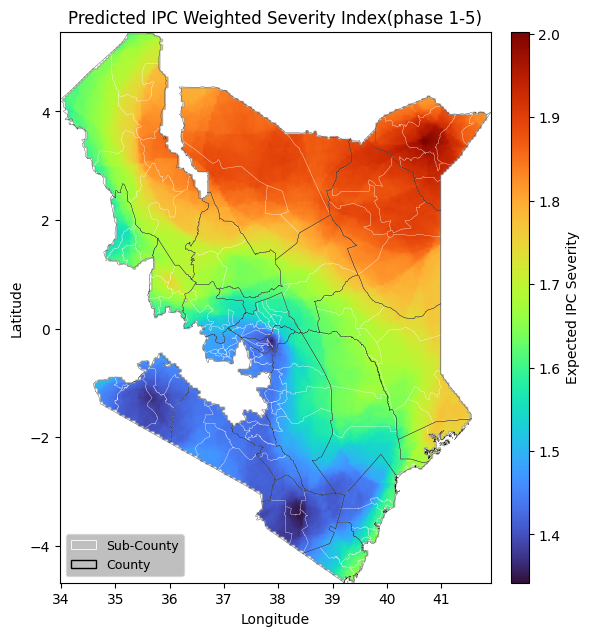

In [ ]:
#activate libarries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(6, 8))
ax = plt.gca() #get the data axes

#plot the raster
im = ax.imshow(
    grid_sev_clip,
    extent=[unique_lons.min(), unique_lons.max(),
            unique_lats.min(), unique_lats.max()],
    origin="lower",
    cmap="turbo"
    #vmin=1, vmax=4
)

# add sub counties boundary
sub_counties.plot(
    ax=ax,
    edgecolor="white",
    linewidth=0.2,
    facecolor='none',
    alpha=0.7
)

# add  counties boundary
gdf_ipc.boundary.plot(
    ax=ax,
    edgecolor="black",
    linewidth=0.2
    #alpha=0.9
)

# add legend
import matplotlib.patches as mpatches

sub_patch = mpatches.Patch(
    facecolor='none', edgecolor='white', linewidth=0.6,
    label='Sub-County'
)

county_patch = mpatches.Patch(
    facecolor='none', edgecolor='black', linewidth=1.0,
    label='County'
)

ax.legend(
    handles=[sub_patch, county_patch],
    loc='lower left',
    frameon=True,
    facecolor='gray',
    framealpha=0.5,
    fontsize=9
)

#defin ethe colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.2)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Expected IPC Severity")

# labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Predicted IPC Weighted Severity Index(phase 1-5)")

plt.tight_layout()
plt.show()

Despite the IPC classifying several counties as Phase 3 (Crisis), our analysis found that the majority of the population in those same counties is actually concentrated in Phase 2 (Stressed). This aligns fully with the IPC population distribution data, which shows that even in counties labeled as Phase 3, only a smaller proportion of households meet the Crisis threshold while most remain in less severe conditions. As a result, the population-weighted severity index naturally stays closer to 1–2, reflecting the overall distribution rather than the classification label alone.

# CRISIS SHARE

While the IPC overall phase provides a high-level classification of counties into Phase 2 (Stressed) or Phase 3 (Crisis), this label alone does not capture how many people are actually affected. To build a more informative and model-friendly indicator, we compute Crisis Share, defined as the proportion of the population in IPC Phase 3, Phase 4, and Phase 5 (P3 + P4 + P5). This continuous measure tells us how severe the crisis is in terms of population impact, rather than simply indicating whether the county crosses the IPC crisis threshold.

Crisis Share is important because it captures both prevalence and intensity. Two counties may both be classified as Phase 3 in the IPC system, but one may have 12% of its population in Crisis while another has 30%. The overall phase label cannot distinguish these cases, but crisis share can. This richer variation makes crisis share far more suitable for statistical modelling, regression, and generating continuous spatial risk surfaces from SatCLIP embeddings.

Compared to our first model—which predicted the binary overall phase (2 vs 3) Crisis Share provides a more nuanced understanding of acute food insecurity. The binary model answers a simple yes/no question: “Is this county in Crisis?” Crisis Share answers a deeper question: “How much of the population is experiencing Crisis or worse?” Because of this, Crisis Share complements the binary model by offering intensity-level insights that the official categorical phase cannot provide. This combination allows us to reproduce IPC classifications while also mapping the underlying variation that drives crisis severity across counties.

## Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#embedings
X = df_emb[emb_cols].to_numpy(dtype=float)
#target
y_cs = df_emb["crisis_share"].to_numpy(dtype=float)

#loocv set up
loo = LeaveOneOut()
scaler_cv = StandardScaler()

#random forest model
model_cv = RandomForestRegressor(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

#true and pred empty list
y_true, y_pred = [], []

#loocv loop
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_cs[train_idx], y_cs[test_idx]

    # scale training only
    X_train_scaled = scaler_cv.fit_transform(X_train)
    X_test_scaled = scaler_cv.transform(X_test)

    # fit model
    model_cv.fit(X_train_scaled, y_train)

    # predict left-out sample
    y_hat = model_cv.predict(X_test_scaled)

    y_true.append(y_test[0])
    y_pred.append(y_hat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

#metrics evaljuation
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


#train final model
scaler_cs = StandardScaler()
X_scaled_full = scaler_cs.fit_transform(X)

#preict all data using final model
model_cs_final = RandomForestRegressor(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

model_cs_final.fit(X_scaled_full, y_cs)


RMSE: 0.06717027681167109
R²: 0.076686042553192


RandomForestRegressor(max_depth=6, n_estimators=500, random_state=42)

The Random Forest regression model produced an LOOCV RMSE of approximately 0.067 and an R² of about 0.077 when predicting Crisis Share. These results indicate that, on average, the model’s predictions differ from the true crisis-share values by roughly 6–7 percentage points, which is a relatively small error given that crisis share itself ranges only from 0 to about 0.30 in the dataset. This shows that the model is capturing meaningful variation in the proportion of the population experiencing IPC Phase 3 or worse.

The positive R² value, although modest, is an important improvement over the severity-index models, which produced negative R² scores due to low variability in the target. A positive R² here means that the Random Forest model performs better than simply predicting the mean crisis share for all counties, confirming that the SatCLIP embeddings contain useful geospatial signals associated with acute food insecurity conditions.

## Prediction

In [ ]:
# Extract grid embeddings
X_grid = df_grid_emb[emb_cols].to_numpy(dtype=float)

#standardize using the scaler
X_grid_scaled = scaler_cs.transform(X_grid)

##predict the crisi share
pred_cs_grid = model_cs_final.predict(X_grid_scaled)

# save the predicted cris share in the dataframe
df_grid_emb["pred_crisis_share"] = pred_cs_grid
df_grid_emb.head()
crisis_share_column=df_emb['crisis_share']

#add crisi share to the df_grid_emb
df_grid_emb['crisis_share'] = crisis_share_column

df_grid_emb[["lon", "lat","crisis_share", "pred_crisis_share"]].head()


,lon,lat,crisis_share,pred_crisis_share
0,33.974412,-4.679623,0.20,0.1013
1,33.974412,-4.629623,0.15,0.1013
2,33.974412,-4.579623,0.05,0.1013
3,33.974412,-4.529623,0.10,0.1008
4,33.974412,-4.479623,0.05,0.1008


In [ ]:
# unique grid coordinates (same as before)
unique_lons = np.unique(df_grid_emb["lon"])
unique_lats = np.unique(df_grid_emb["lat"])

nx = len(unique_lons)
ny = len(unique_lats)

print("Raster size:", nx, "x", ny)

# empty raster
grid_cs = np.full((ny, nx), np.nan, dtype=float)

# mapping from lon/lat to indices
lon_idx = {lon: i for i, lon in enumerate(unique_lons)}
lat_idx = {lat: j for j, lat in enumerate(unique_lats)}

# fill raster
for lon, lat, val in zip(
    df_grid_emb["lon"],
    df_grid_emb["lat"],
    df_grid_emb["pred_crisis_share"]
):
    i = lon_idx[lon]
    j = lat_idx[lat]
    grid_cs[j, i] = val

Raster size: 160 x 204


In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Kenya geometry from your IPC polygons
kenya = gdf_ipc.dissolve()
kenya_geom = kenya.geometry.iloc[0]

# Convert grid to points
gdf_pts = gpd.GeoDataFrame(
    df_grid_emb[["lon", "lat", "pred_crisis_share"]],
    geometry=gpd.points_from_xy(df_grid_emb["lon"], df_grid_emb["lat"]),
    crs="EPSG:4326"
)

# mask for inside Kenya
mask_inside = gdf_pts.within(kenya_geom)

# new raster for clipped values
grid_cs_clip = np.full_like(grid_cs, np.nan)

# fill clipped raster
for lon, lat, val, inside in zip(
    gdf_pts["lon"],
    gdf_pts["lat"],
    gdf_pts["pred_crisis_share"],
    mask_inside
):
    if inside:
        j = lat_idx[lat]
        i = lon_idx[lon]
        grid_cs_clip[j, i] = val

## Map

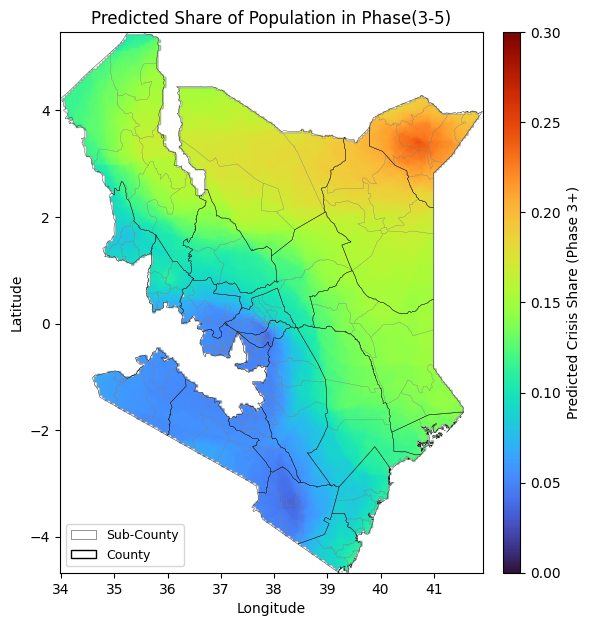

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(6, 8))
ax = plt.gca()

# plot raster
im = ax.imshow(
    grid_cs_clip,
    extent=[unique_lons.min(), unique_lons.max(),
            unique_lats.min(), unique_lats.max()],
    origin="lower",
    cmap="turbo",
    vmin=0, vmax=0.30
)

# add sub counties boundary
sub_counties.plot(
    ax=ax,
    edgecolor="gray",
    linewidth=0.2,
    facecolor='none',
    alpha=0.7
)

# add  counties boundary
gdf_ipc.boundary.plot(
    ax=ax,
    edgecolor="black",
    linewidth=0.2
    #alpha=0.9
)

# add legend
import matplotlib.patches as mpatches

sub_patch = mpatches.Patch(
    facecolor='none', edgecolor='gray', linewidth=0.6,
    label='Sub-County'
)

county_patch = mpatches.Patch(
    facecolor='none', edgecolor='black', linewidth=1.0,
    label='County'
)

ax.legend(
    handles=[sub_patch, county_patch],
    loc='lower left',
    frameon=True,
    #facecolor='gray',
    #framealpha=0.5,
    fontsize=9
)

# -colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.2)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Predicted Crisis Share (Phase 3+)")

# labels and titles
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Predicted Share of Population in Phase(3-5)")

plt.tight_layout()
plt.show()

# Final Notes: Summary, Value of SatCLIP, Limitations, and Future Improvements

This study explored the use of SatCLIP, a foundation model for geospatial representation learning, to extract location embeddings and predict different aspects of acute food insecurity in Kenya. SatCLIP provides a powerful way to encode environmental, climatic, and contextual information directly from geolocation, without relying on handcrafted variables. This allowed us to investigate whether learned spatial representations contain meaningful signals associated with IPC food insecurity outcomes.

Across multiple modelling tasks, the embeddings demonstrated a clear ability to distinguish Crisis and non-Crisis areas (IPC Phase 2 vs 3), reproduce spatial patterns of Crisis+ prevalence, and generate continuous risk surfaces when predicting Crisis Share and the Severity Index. The binary Crisis+ model captured the threshold-based IPC classification well. The Crisis Share regression model produced the strongest and most meaningful results, offering a smooth and interpretable estimate of the proportion of the population experiencing IPC Phase 3 or worse. The Severity Index, while conceptually useful, showed limited variability in the Kenyan dataset, making it harder for models to learn; however, it still provided complementary insights by summarizing the population-weighted distribution of IPC phases.

Despite promising results, the approach also has limitations. **SatCLIP embeddings represent general geospatial patterns but may miss localized drivers of food insecurity, such as shocks, market disruptions, conflict, or household-level vulnerabilities**. The dataset used for training and validation is small (county-level IPC estimates), which constrains model performance and reduces generalizability. Additionally, the Crisis+ and Crisis Share predictions are static and rely on a single IPC season, rather than capturing temporal dynamics. The models also do not incorporate socio-economic, livelihood, or nutrition variables that influence IPC classification beyond environmental context.

**Future improvements may involve integrating additional covariates (rainfall, vegetation anomalies, market prices, accessibility, poverty indices), combining SatCLIP embeddings with temporal features, or using a larger and more diverse training dataset across multiple countries and IPC seasons.** Exploring PCA compression, hyperparameter tuning, or temporal foundation models could also improve predictive performance. Ultimately, SatCLIP provides a strong foundation for mapping spatial vulnerability, but its outputs should be interpreted as complementary to not a replacement for comprehensive IPC analysis that integrates food security, nutrition, and livelihood evidence.